In [ ]:
pip install numpy pandas matplotlib scikit-learn tensorflow surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357285 sha256=c253dda465b1a672419608662e1eb9bc898d5b45156481d40c3b5583d78785fc
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('Final-Fashion-Dataset.csv')


In [ ]:
print(data.head())
print(data.describe())

          id gender masterCategory subCategory  articleType baseColour  \
0  15970.jpg    Men        Apparel     Topwear       Shirts  Navy Blue   
1  39386.jpg    Men        Apparel  Bottomwear        Jeans       Blue   
2  59263.jpg  Women    Accessories     Watches      Watches     Silver   
3  21379.jpg    Men        Apparel  Bottomwear  Track Pants      Black   
4  53759.jpg    Men        Apparel     Topwear      Tshirts       Grey   

   season    year   usage                             productDisplayName  \
0    Fall  2011.0  Casual               Turtle Check Men Navy Blue Shirt   
1  Summer  2012.0  Casual             Peter England Men Party Blue Jeans   
2  Winter  2016.0  Casual                       Titan Women Silver Watch   
3    Fall  2011.0  Casual  Manchester United Men Solid Black Track Pants   
4  Summer  2012.0  Casual                          Puma Men Grey T-shirt   

    filename                                               link  ratings  \
0  15970.jpg  http://a

In [ ]:
data.tail()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
32495,11402.jpg,Men,Apparel,Topwear,Sweatshirts,Black,Fall,2011.0,Casual,United Colors of Benetton Men Winter Black Swe...,11402.jpg,http://assets.myntassets.com/v1/images/style/p...,4.0,"High quality fabric, very satisfied. for speci...",March,44.0
32496,5527.jpg,Men,Apparel,Topwear,Tshirts,Purple,Summer,2011.0,Casual,Mr.Men Men's Mr.Funny Purple T-shirt,5527.jpg,http://assets.myntassets.com/v1/images/style/p...,1.0,"Terrible quality, not worth the money. especia...",April,26.0
32497,44600.jpg,Men,Accessories,Wallets,Wallets,Blue,Summer,2012.0,Casual,Van Heusen Men Blue Wallet,44600.jpg,http://assets.myntassets.com/v1/images/style/p...,3.0,"Decent product, but could be better. especiall...",September,20.0
32498,14170.jpg,Men,Accessories,Belts,Belts,Black,Fall,2011.0,Formal,Belmonte Men Rough Finish Black Belts,14170.jpg,http://assets.myntassets.com/v1/images/style/p...,2.0,"Poor material, doesn't last long. for casual o...",August,20.0
32499,21297.jpg,Women,Accessories,Eyewear,Sunglasses,Copper,Winter,2016.0,Casual,Celine Dion Women Copper Frame Sunglasses,21297.jpg,http://assets.myntassets.com/v1/images/style/p...,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(32500, 16)

In [ ]:
data.columns.tolist()

['id',
 'gender',
 'masterCategory',
 'subCategory',
 'articleType',
 'baseColour',
 'season',
 'year',
 'usage',
 'productDisplayName',
 'filename',
 'link',
 'ratings',
 'review',
 'Month',
 'Price (USD)']

In [ ]:
data.nunique()

,0
id,32500
gender,5
masterCategory,7
subCategory,44
articleType,139
baseColour,46
season,4
year,13
usage,8
productDisplayName,23899


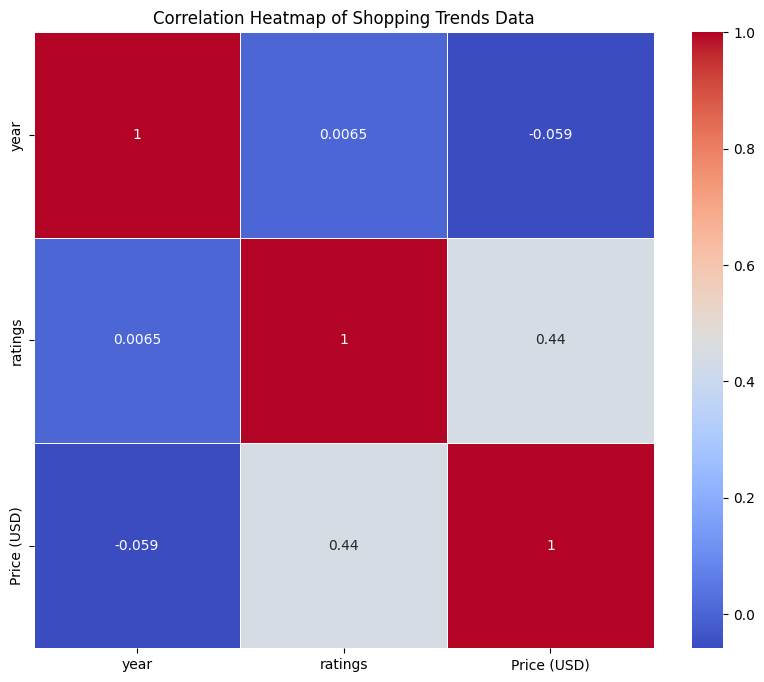

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('updated_dataset.csv')

# Check for numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Shopping Trends Data')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('updated_dataset.csv')

# Display dataset columns
print(data.columns)

# Separate features into categorical and numerical
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data_onehot = pd.get_dummies(data, columns=categorical_features)

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())


Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'filename', 'link', 'ratings', 'review', 'Month', 'Price (USD)'],
      dtype='object')
      id  gender  masterCategory  subCategory  articleType  baseColour  \
0   3717       2               1           38          101          25   
1  17868       2               1            6           54           2   
2  29544       4               0           41          136          37   
3   7223       2               1            6          124           1   
4  26157       2               1           38          130          13   

   season      year  usage  productDisplayName  filename   link   ratings  \
0       0 -0.849557      0               21331      3717  12776  0.308098   
1       2 -0.379123      0               15913     17868   7828  0.308098   
2       3  1.502612      0               21151     29544  22611  0.308098   
3       0 -

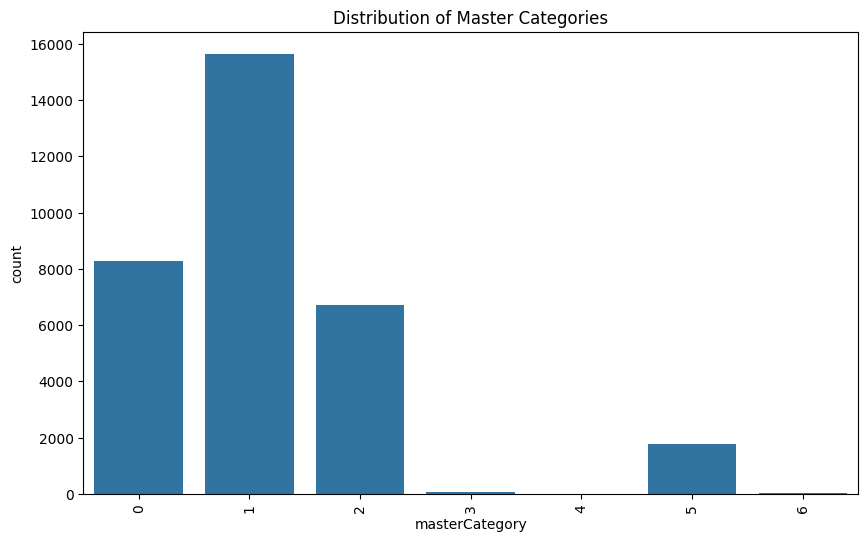

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of master categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='masterCategory')
plt.title('Distribution of Master Categories')
plt.xticks(rotation=90)
plt.show()



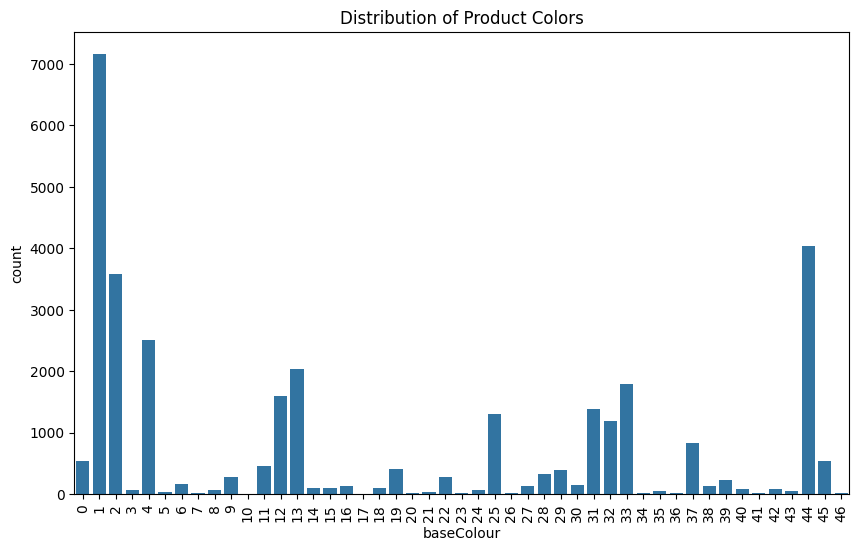

In [ ]:
# Distribution of product colors
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='baseColour')
plt.title('Distribution of Product Colors')
plt.xticks(rotation=90)
plt.show()


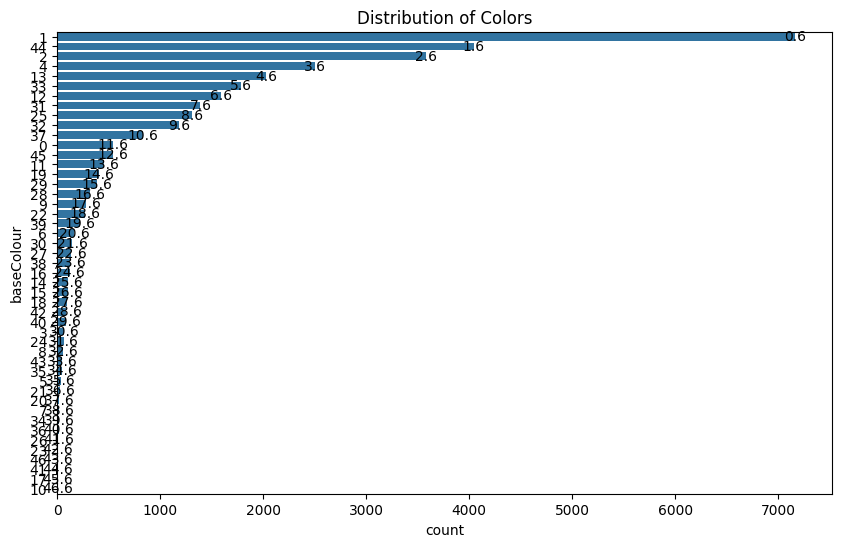

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='baseColour', data=data, order=data['baseColour'].value_counts().index)

# Set the title
plt.title('Distribution of Colors')

# Add color names on the bars
for p in ax.patches:
    ax.annotate(p.get_y() + 1, (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

# Show the plot
plt.show()



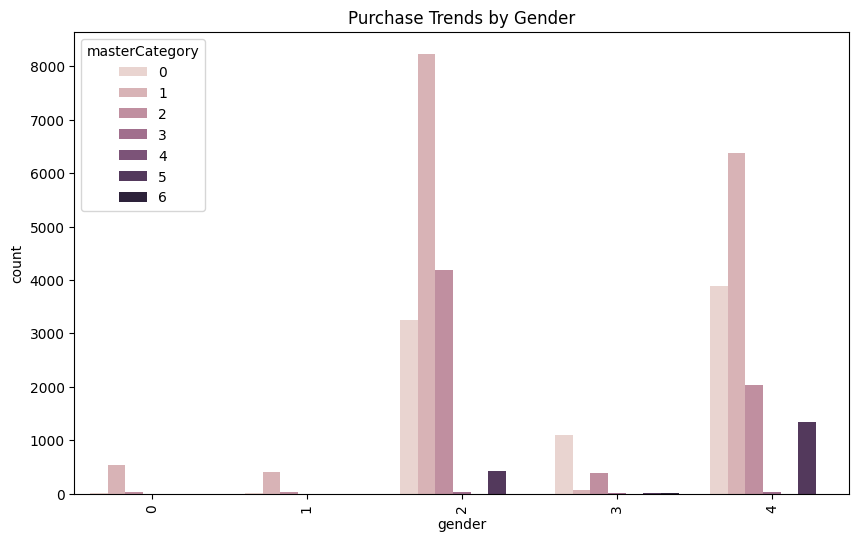

In [ ]:
# Purchase trends by gender and master categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender', hue='masterCategory')
plt.title('Purchase Trends by Gender')
plt.xticks(rotation=90)
plt.show()


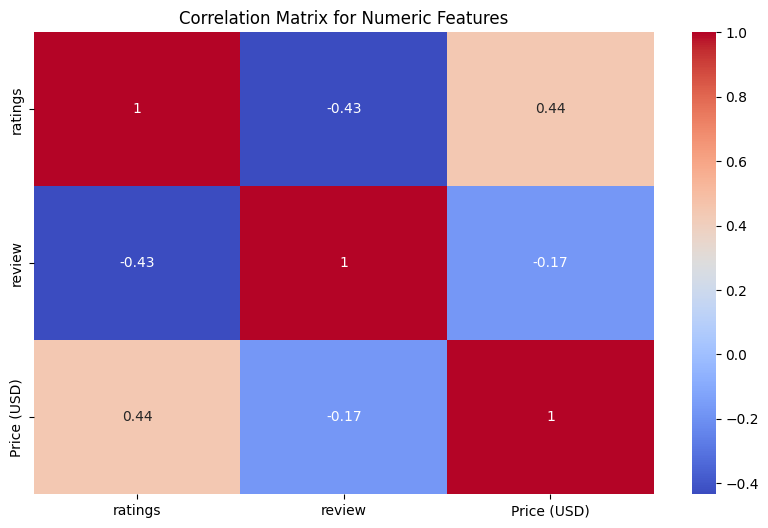

In [ ]:
# Correlation analysis for numeric features
numeric_columns = ['ratings', 'review', 'Price (USD)']

correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()


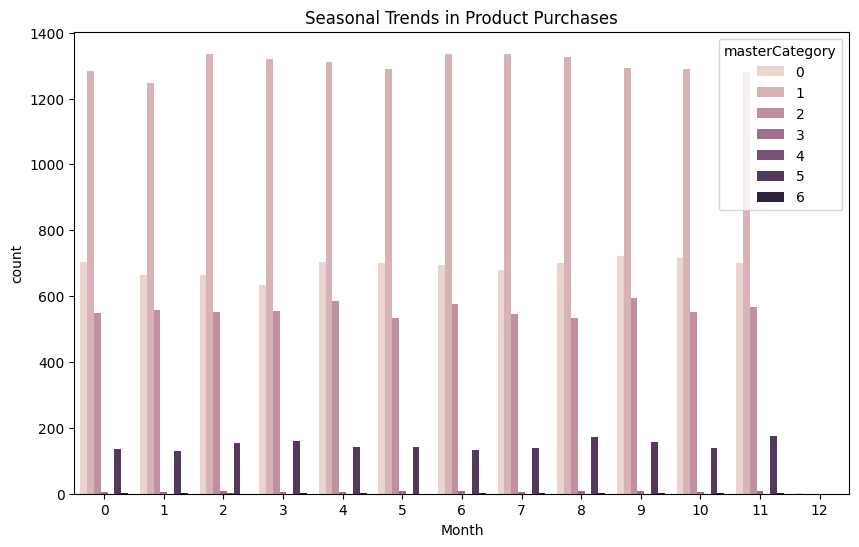

In [ ]:
# Seasonal trends in product purchases by month and masterCategory
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Month', hue='masterCategory')
plt.title('Seasonal Trends in Product Purchases')
plt.show()


**CLUSTERING ANALYSIS**

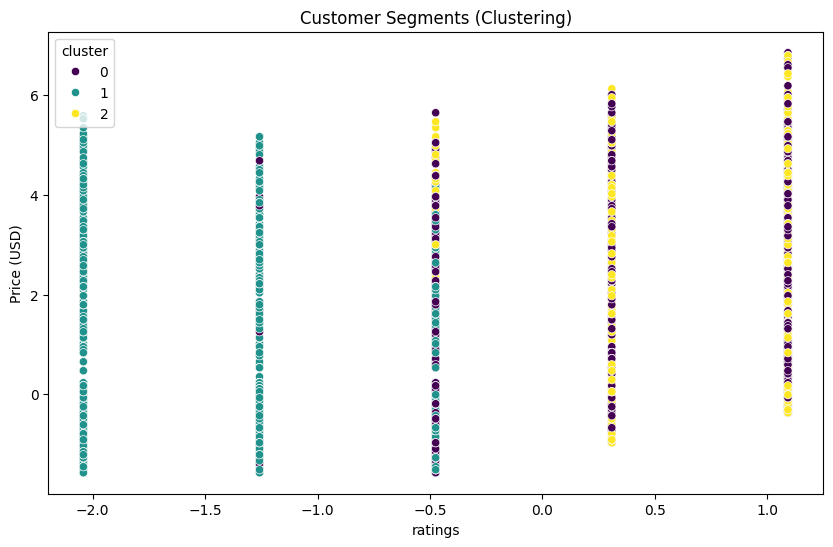

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Select features for clustering and remove rows with missing values
features = ['ratings', 'Price (USD)', 'review']
clustering_data = data[features].dropna()

# Use MinMaxScaler to scale the features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Create a new dataframe for the clustering results
clustering_data['cluster'] = clusters

# Assign clusters back to the original data
data.loc[clustering_data.index, 'cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data, x='ratings', y='Price (USD)', hue='cluster', palette='viridis')
plt.title('Customer Segments (Clustering)')
plt.show()
